In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import calendar
from datetime import datetime
%matplotlib inline

In [49]:
daily_ppt = pd.read_csv('BHL_weather_data.csv')
daily_ppt.head()

,Date,precipMM,tempC
0,2015-01-01,0.0,-7.375
1,2015-01-02,0.0,-5.875
2,2015-01-03,0.0,-4.875
3,2015-01-04,1.3,-17.375
4,2015-01-05,0.3,-14.625


In [50]:
daily_ppt ['year'] = pd.DatetimeIndex(daily_ppt['Date']).year
daily_ppt ['month'] = pd.DatetimeIndex(daily_ppt['Date']).month

daily_ppt.head()

,Date,precipMM,tempC,year,month
0,2015-01-01,0.0,-7.375,2015,1
1,2015-01-02,0.0,-5.875,2015,1
2,2015-01-03,0.0,-4.875,2015,1
3,2015-01-04,1.3,-17.375,2015,1
4,2015-01-05,0.3,-14.625,2015,1


In [51]:
daily_ppt['Date'] = pd.to_datetime(daily_ppt['Date'])

In [52]:
startdate = daily_ppt.iloc[0,0]
#startdate = pd.to_datetime(startdate)

numrows = len(daily_ppt)
enddate = daily_ppt.iloc[numrows-1,0]
#enddate = pd.to_datetime(enddate)
print(enddate)

2018-12-31 00:00:00


In [53]:
# split the dataset based on year
gbl = globals()

startyear = startdate.year
endyear = enddate.year
years = list(range(startyear, endyear+1))

for curr_year in years:
    year_name = str(curr_year)
    gbl['ppt_'+year_name] = daily_ppt[daily_ppt['year'] == curr_year]
    # the dataframe for each year can be called using 'ppt_YYYY'    

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


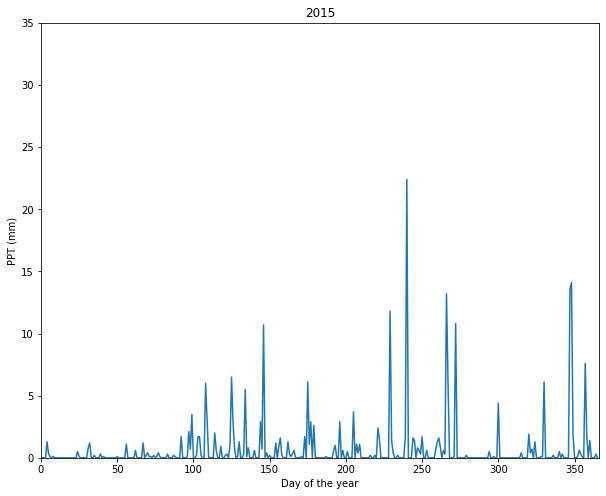

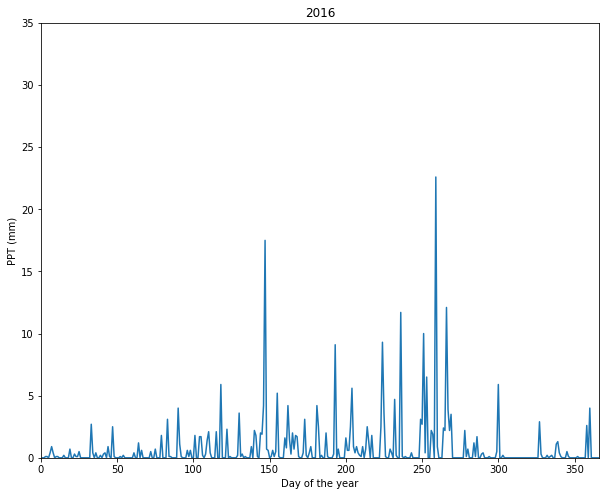

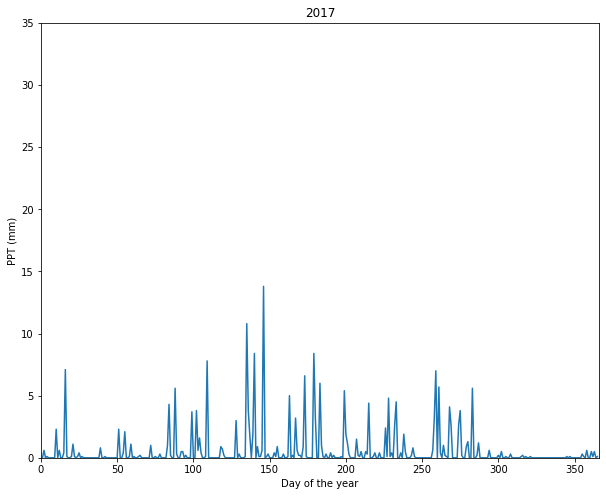

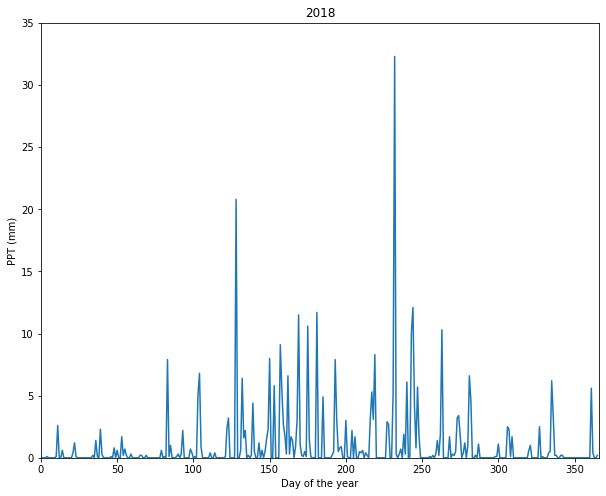

In [71]:
# plot daily ppt
import matplotlib.pyplot as plt

# extract day of year from Date, then plot time series daily ppt
monitoring_years = (ppt_2015, ppt_2016, ppt_2017, ppt_2018) # same comment as above, would like to automate this naming
startyear = startdate.year

for df in (monitoring_years):
    df['Day_of_year'] = df['Date'].dt.dayofyear
    plt.plot(df['Day_of_year'], df['precipMM'])
    plt.title(startyear)
    plt.xlabel('Day of the year')
    plt.ylabel('PPT (mm)')
    plt.axis([0, 366, 0, 35])
    plt.show()
    startyear = startyear + 1

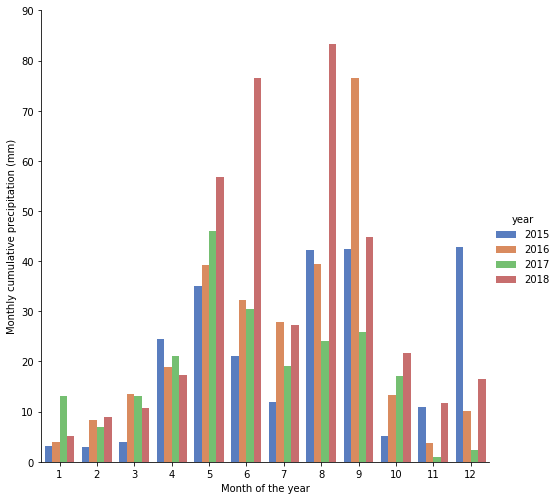

In [72]:
# calculate and plot monthly cumulative
import seaborn as sns

monthly_precip = pd.DataFrame(daily_ppt.groupby(['year','month']).sum()['precipMM'])
monthly_precip.reset_index(inplace=True)
monthly_plot = sns.catplot(x="month", y="precipMM", hue="year", data=monthly_precip, height=7, kind="bar", palette="muted")
plt.ylim(0,90)
plt.xlabel('Month of the year')
plt.ylabel('Monthly cumulative precipitation (mm)')
plt.show()

In [73]:
# calculating cumulative precip
monitoring_years = (ppt_2015, ppt_2016, ppt_2017, ppt_2018) 
# Ideally, I want to use the loop to replace the script (manually inserted dataframe names) above but I couldn't get it to work 
# It should look something like 'ppt_'& YYYY (i.e. calling dataframes with two parts name fixedname+numericalname)

for df in (monitoring_years):
    df['cum_precipMM'] = df['precipMM'].cumsum()

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [74]:
print(ppt_2015.head())

        Date  precipMM   tempC  year  month  cum_precipMM  Day_of_year
0 2015-01-01       0.0  -7.375  2015      1           0.0            1
1 2015-01-02       0.0  -5.875  2015      1           0.0            2
2 2015-01-03       0.0  -4.875  2015      1           0.0            3
3 2015-01-04       1.3 -17.375  2015      1           1.3            4
4 2015-01-05       0.3 -14.625  2015      1           1.6            5


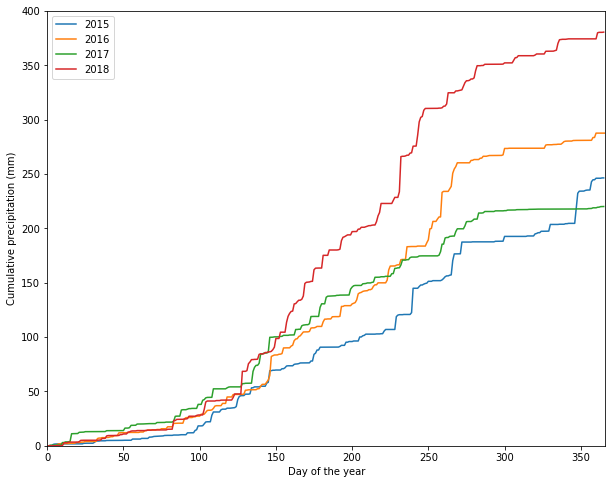

In [79]:
# cumulative precip plot
startyear = startdate.year

for df in (monitoring_years):
    plt.plot(df['Day_of_year'], df['cum_precipMM'], label = startyear)
    startyear = startyear +1

plt.rcParams["figure.figsize"] = (10,8) 
plt.legend()
plt.axis([0, 366, 0, 400])
plt.xlabel('Day of the year')
plt.ylabel('Cumulative precipitation (mm)')
plt.show()
